# Using PWF_reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PWF_reconstruction.recons_PWF import PWF_semianalytical, Covariance_tangentplane

We will use a dummy event to illustrate the package.

In [2]:
x_ants = np.array([[6062., 3499.99975586, 1025.68994141],
                   [8660., -2000.00024414, 981.16998291],
                   [6928., -1000.00024414, 991.2800293],
                   [8660., -1000.00024414, 961.09997559],
                   [7794., -500.00036621, 975.90997314],
                   [7794., 499.99975586, 988.53997803],
                   [6928., 999.99975586, 982.96002197],
                   [6928., 1999.99975586, 994.59997559],
                   [6062., 2499.99975586, 998.46002197]])
t_ants = np.array([-8.41008848e-06, 1.11909904e-05, 6.03631933e-06, 8.25434167e-06, 5.65372435e-06, 2.69038597e-06, 7.60043411e-08, -2.87709951e-06,-5.44485484e-06])
k = np.array([ 0.38488077, -0.88474286, -0.26286282]) 
theta, phi = 74.76, 113.51

We can run a reconstruction on this event. We see that the prediction is close to the target values : $\theta= 74.76$° and $\phi = 113.51$°.

In [3]:
theta_pred, phi_pred = PWF_semianalytical(x_ants, t_ants)
print('θ_pred =', np.round(theta_pred*180/np.pi, 2), '°')
print("ϕ_pred =", np.round(phi_pred*180/np.pi, 2), '°')

θ_pred = 74.96 °
ϕ_pred = 113.17 °


## Estimating the uncertainty on $\theta$ and $\phi$

With that prediction, we can estimate the covariance of our estimator. This matrix describe how the estimator is distributed.

We have to estimate the noise on the antenna timing measurements.

In [4]:
sigma = np.sqrt(1.51e-8**2 + 1e-8**2)

In [5]:
Sigma = Covariance_tangentplane(theta_pred, phi_pred, x_ants, sigma)
print(Sigma)

[[ 1.43976243e-05 -2.91488780e-06]
 [-2.91488780e-06  1.83092418e-05]]


We can visualise this distribution with the `plot_distribs` function in `visualisation`

In [6]:
from PWF_reconstruction.visualisation import plot_distribs

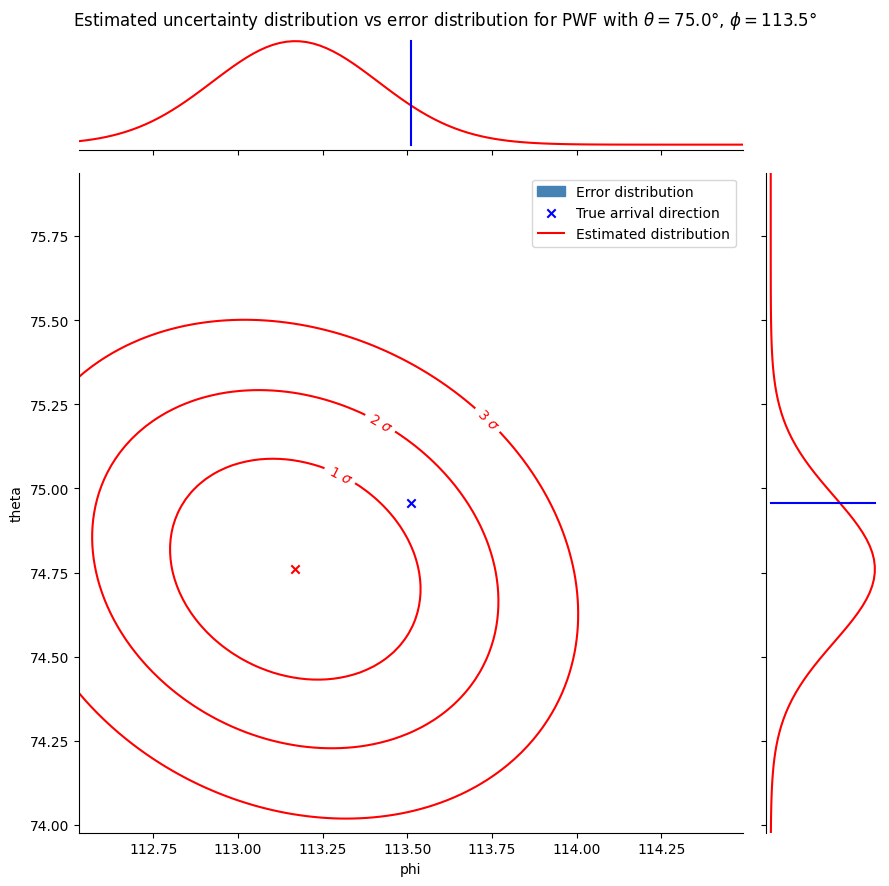

In [7]:
plot_distribs(np.array([]), np.array([]), Sigma, theta_pred, phi/180*np.pi, theta/180*np.pi, phi_pred)